# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib.pyplot as plt

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

## Local library import
We import all the required local libraries libraries

In [2]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
import yfinance
import scipy.stats
# Import local libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import
We retrieve all the required data for the analysis.

In [3]:
first = pd.read_csv('INDEX.CSI300_120101_141231.csv', delimiter = ",")
second = pd.read_csv('INDEX.CSI300_150101_171231.csv', delimiter = ",")
third = pd.read_csv('INDEX.CSI300_180101_201231.csv', delimiter = ",")
fourth = pd.read_csv('INDEX.CSI300_210101_221128.csv', delimiter = ",")

In [4]:
data = pd.DataFrame()
for i in [first, second, third, fourth]:
    data = data.append(i, ignore_index = True)
display(data)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,INDEX.CSI300,5,20120104,54500,2361.4990,2361.4990,2361.4990,2361.4990,245403
1,INDEX.CSI300,5,20120104,55000,2363.8790,2364.2060,2355.8910,2355.8910,2013863
2,INDEX.CSI300,5,20120104,55500,2355.7500,2358.2700,2355.3040,2358.0250,1148331
3,INDEX.CSI300,5,20120104,60000,2358.4710,2365.8240,2358.2800,2363.9270,1411218
4,INDEX.CSI300,5,20120104,60500,2364.4720,2365.9150,2361.3150,2361.3150,1345723
...,...,...,...,...,...,...,...,...,...
155829,INDEX.CSI300,5,20221128,105000,3733.2424,3733.2424,3733.2424,3733.2424,60
155830,INDEX.CSI300,5,20221128,105500,3733.2424,3733.2424,3733.2424,3733.2424,59
155831,INDEX.CSI300,5,20221128,110000,3733.2424,3733.2424,3733.2424,3733.2424,59
155832,INDEX.CSI300,5,20221128,110500,3733.2424,3733.2424,3733.2424,3733.2424,56


In [5]:
import datetime
def time_and_date (df):
    date = []
    only_date = []
    for row in df.iterrows():
        #print(row[1]['<TIME>'])
        date_obj = row[1]['<DATE>']
        time_obj = row[1]['<TIME>']
        #print((time_obj % 10000)//100)
        #days.append((date_obj % 10000) // 100)
        only_date.append(datetime.datetime(date_obj // 10000, (date_obj % 10000) // 100, date_obj % 100))
        date.append(datetime.datetime(date_obj // 10000, (date_obj % 10000) // 100, date_obj % 100, time_obj //10000, (time_obj % 10000)//100 ))
    df['Date'] = date
    df['Only_date'] = only_date

In [6]:
time_and_date(data)

In [7]:
data = data.drop(columns = [x for x in data.columns if x not in ['<CLOSE>', 'Date', 'Only_date']])
data = data.rename(columns = {'<CLOSE>': 'Close'})

In [8]:
data = data.drop(data.loc[data['Only_date'] > '2022-11-27'].index.to_list(), axis = 0)

In [9]:
display(data)

,Close,Date,Only_date
0,2361.4990,2012-01-04 05:45:00,2012-01-04
1,2355.8910,2012-01-04 05:50:00,2012-01-04
2,2358.0250,2012-01-04 05:55:00,2012-01-04
3,2363.9270,2012-01-04 06:00:00,2012-01-04
4,2361.3150,2012-01-04 06:05:00,2012-01-04
...,...,...,...
155765,3775.7764,2022-11-25 10:50:00,2022-11-25
155766,3775.7764,2022-11-25 10:55:00,2022-11-25
155767,3775.7764,2022-11-25 11:00:00,2022-11-25
155768,3775.7764,2022-11-25 11:05:00,2022-11-25


In [5]:
data['Date']

0       2012-10-26
1       2012-10-29
2       2012-10-30
3       2012-10-31
4       2012-11-01
           ...    
2464    2022-10-31
2465    2022-11-01
2466    2022-11-02
2467    2022-11-03
2468    2022-11-04
Name: Date, Length: 2469, dtype: object

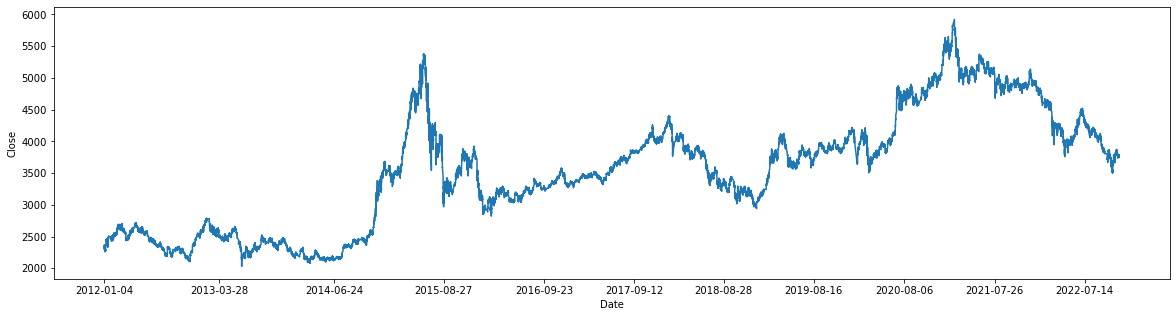

In [11]:
plt.figure(figsize = (20,5))
plt.plot(data['Date'], data['Close'])
plt.xticks(data['Date'][::15000])
plt.ylabel('Close')
plt.xlabel('Date')
plt.show()

# Data processing

In [12]:
#returns = data['Close'].pct_change().dropna()
returns = pd.DataFrame({
    'returns': data['Close'].pct_change().dropna(),
    'date': data['Date'][1:],
    'only_date': data['Only_date'][1:]
    
#    'rv': [x**2 for x in returns['returns']]
})
def realised_volatility(df):
    rv = []
    dates = []
    for date in df['only_date'].unique():
        _ = df.loc[df['only_date'] == date]
        rv.append(np.sum([x**2 for x in _['returns'].values]))
        dates.append(date)
    #= [x**2 for x in rv_per_day['returns']]
    new_df = pd.DataFrame({'rv': rv, 'date': dates})
    return new_df

"\nreturns_ = data['Close'].pct_change().dropna()\nrv =[]\ndates = []\nfor i in range(4, returns_.shape[0], 5):\n    rv.append(np.sum([x**2 for x in returns_[i-5:i]])/5)\n    dates.append(data['Date'][i])\n\nrv_per_week = pd.DataFrame({'date': dates, 'rv': rv})\n#returns['week_number'] = [y.dt.isocalendar().week for y in [pd.Timestamp(x) for x in returns['date']]]\n#print(returns.shape)"

In [13]:
rv_per_day = realised_volatility(returns)

In [218]:
returns = returns.drop(returns.loc[returns['only_date'] > '2022-11-27'].index.to_list(), axis = 0)
rv_per_day = rv_per_day.drop(rv_per_day.loc[rv_per_day['date'] > '2022-11-27'].index.to_list(), axis = 0)

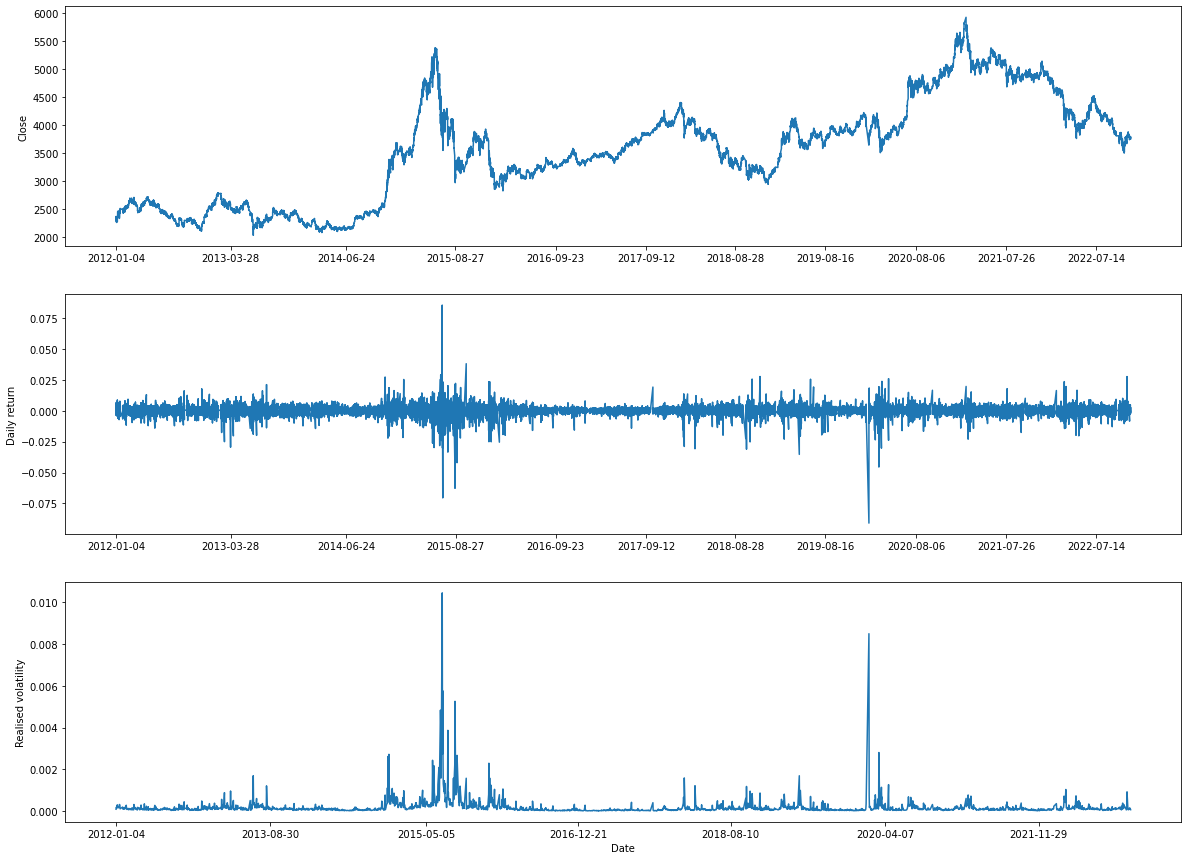

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

ax[0].plot(data['Date'], data['Close'])
ax[0].set_xticks(data['Date'][::15000])
ax[0].set_ylabel('Close')
#ax.xlabel('Date')

ax[1].plot(returns['only_date'], returns['returns'])
ax[1].set_xticks(returns['only_date'][::15000])
ax[1].set_ylabel('Daily return')
#ax.xlabel('Date')

ax[2].plot(rv_per_day['date'], rv_per_day['rv'])
ax[2].set_xticks(rv_per_day['date'][::400])
ax[2].set_ylabel('Realised volatility')
ax[2].set_xlabel('Date')



plt.show()

C:\Users\dcher\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


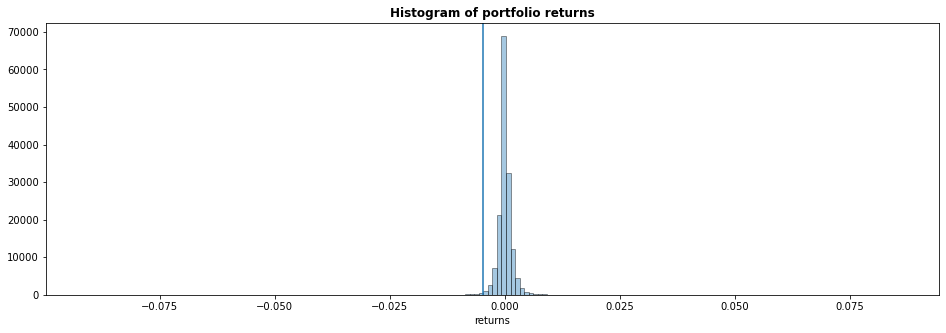

-0.004643794995011481


In [15]:
import seaborn as sns
fig = plt.figure(figsize=(16, 5))

sns.distplot(returns['returns'], hist=True, kde=False, 
             bins=180,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(np.quantile(returns['returns'], 0.01))
plt.title("Histogram of portfolio returns", weight="bold")

plt.show()
print(np.quantile(returns['returns'], 0.01))

In [17]:
from statsmodels.tsa.stattools import adfuller
data_characteristics = pd.DataFrame()
i = 0
#print(np.quantile(returns['returns'], 0.01))
for ind, dat in enumerate([returns['returns'].values, rv_per_day['rv'].values]):
    data_characteristics.loc[ind, 'mean'] = np.mean(dat)
    data_characteristics.loc[ind, 'var'] = np.var(dat)
    data_characteristics.loc[ind, 'skewness'] = scipy.stats.skew(dat)
    data_characteristics.loc[ind, 'kurtuosis'] = scipy.stats.kurtosis(dat)
    data_characteristics.loc[ind, 'Jarque-Bera'] = scipy.stats.jarque_bera(dat)[0]
    data_characteristics.loc[ind, 'ADF'] = adfuller(dat)[0]
    print(adfuller(dat))
    print(scipy.stats.jarque_bera(dat))


(-46.42862950715359, 0.0, 73, 155695, {'1%': -3.4303920013989955, '5%': -2.8615585640335004, '10%': -2.566779880972682}, -1535341.4049333697)
Jarque_beraResult(statistic=143249825.24450633, pvalue=0.0)
(-5.598227450393882, 1.2824026327000734e-06, 28, 2613, {'1%': -3.432855065314769, '5%': -2.8626467455889886, '10%': -2.567359159973045}, -34498.27034196881)
Jarque_beraResult(statistic=4838983.8632743005, pvalue=0.0)


In [19]:
data_characteristics

,mean,var,skewness,kurtuosis,Jarque-Bera,ADF
0,0.000005,3.061411e-06,-1.566083,148.530490,1.432498e+08,-46.428630
1,0.000180,1.879156e-07,12.036283,208.273793,4.838984e+06,-5.598227


So, we can say that our data is not a stationary timeseries and don`t have normal distribution

# Models

In [40]:
def RV(df_rv, t, i):
    #print(t - datetime.timedelta(i))
    #print(df_rv.loc[df_rv['date'] == t - datetime.timedelta(days = i)]['rv'].values[0])
    if len(df_rv.loc[df_rv['date'] == t - datetime.timedelta(days=i)]['rv'].values) != 0:
        return df_rv.loc[df_rv['date'] == t -
                         datetime.timedelta(days=i)]['rv'].values[0]
    else:
        return 0
    #return df_rv.loc[df_rv['date'] == t - datetime.timedelta(days = i)]['rv'].values[0]  #[x**2 for x in df_r.loc[df_r['only_date'] == t - datetime.timedelta(i)]['returns'].values])


def RV_tj(df_rv, t, j, h):
    return (1 /
            (h + 1 - j)) * np.sum([RV(df_rv, t, i) for i in range(j, h + 1)])


def HAR(df_r, df_rv):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df_rv.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind - 22, 'date'] = x[1]['date']
            HAR_data.loc[ind - 22, 'day'] = df_rv['rv'][ind - 1]
            HAR_data.loc[ind - 22, 'week'] = RV_tj(df_rv, x[1]['date'], 1, 5)
            HAR_data.loc[ind - 22, 'month'] = RV_tj(df_rv, x[1]['date'], 1, 22)
            HAR_data.loc[ind - 22, 'rv'] = df_rv['rv'][ind]
            #HAR_data.loc[ind,
            #             'cvartaly'] = np.sum(rv['returns'][ind - 66:ind]) / 66
    return HAR_data


def HAR_j(df_r, df_rv):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df_rv.iterrows()):
        if ind > 21:
            HAR_data.loc[ind - 22, 'date'] = x[1]['date']
            HAR_data.loc[ind - 22, 'day'] = df_rv['rv'][ind - 1]
            HAR_data.loc[ind - 22, 'week'] = RV_tj(df_rv, x[1]['date'], 1, 5)
            HAR_data.loc[ind - 22, 'month'] = RV_tj(df_rv, x[1]['date'], 1, 22)
            HAR_data.loc[ind - 22, 'jump'] = max(
                0, df_rv['rv'][ind] - (np.pi / 2) * np.sum([
                    df_r.iloc[i - 1]['returns'] * df_r.iloc[i]['returns']
                    for i in df_r.loc[df_r['only_date'] == x[1]
                                      ['date']].index.to_list()[:-1]
                ]))
            HAR_data.loc[ind - 22, 'rv'] = df_rv['rv'][ind]
    return HAR_data


def BPV(df_r, t, i):
    return (np.pi / 2) * np.sum([
        df_r.iloc[i - 1]['returns'] * df_r.iloc[i]['returns']
        for i in df_r.loc[df_r['only_date'] == t -
                          datetime.timedelta(days=i)].index.to_list()
    ])


def BPV_tj(df_r, t, j, h):
    return (1 /
            (h - j + 1)) * np.sum([BPV(df_r, t, i) for i in range(j, h + 1)])


def CHAR(df_r, df_rv):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df_rv.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind, 'date'] = x[1]['date']
            #print(BPV(df_r, x[1]['date'], 1))
            HAR_data.loc[ind-22, 'daily'] = BPV(df_r, x[1]['date'], 1)
            HAR_data.loc[ind-22, 'week'] = BPV_tj(df_r, x[1]['date'], 1, 5)
            HAR_data.loc[ind-22, 'month'] = BPV_tj(df_r, x[1]['date'], 1, 22)
            HAR_data.loc[ind-22, 'rv'] = df_rv['rv'][ind]
            sys.stdout.write('\r' + ' ' * 50 + '\r')  # Очищение строки
            sys.stdout.write(f'{(ind+1)/df_rv.shape[0]}')
            sys.stdout.flush()
    return HAR_data


def SHAR(df_r, df_rv):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df_rv.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind-22, 'date'] = x[1]['date']
            #print(x[1]['returns'])
            ret_positive = []
            ret_negative = []
            for ret in df_r.loc[df_r['only_date'] == x[1]
                                ['date']]['returns'].values:
                if ret > 0:
                    ret_positive.append(ret**2)
                else:
                    ret_negative.append(ret**2)
            HAR_data.loc[ind-22,
                         'day+'] = np.sum(ret_positive) / len(ret_positive)
            HAR_data.loc[ind-22,
                         'day-'] = np.sum(ret_negative) / len(ret_negative)
            HAR_data.loc[ind-22, 'week'] = RV_tj(df_rv, x[1]['date'], 1, 5)
            HAR_data.loc[ind-22, 'month'] = RV_tj(df_rv, x[1]['date'], 1, 22)
            HAR_data.loc[ind-22, 'rv'] = df_rv['rv'][ind]
    return HAR_data


def RQ(df_r, t, i):
    data = df_r.loc[df_r['only_date'] == t -
                    datetime.timedelta(days=i)].reset_index(drop=True)
    #print(data)
    #print('  ')
    #print([(data['returns'][i]) ** 4 for i in range(data.shape[0])])
    return data.shape[0] / 3 * np.sum([(data['returns'][i])**4
                                       for i in range(data.shape[0])])


def HARQ(df_r, df_rv):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df_rv.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind-22, 'date'] = x[1]['date']
            HAR_data.loc[ind-22, 'RQ^1/2'] = RQ(df_r, x[1]['date'],
                                             1) * df_rv['rv'][ind - 1]
            HAR_data.loc[ind-22, 'day'] = df_rv['rv'][ind - 1]
            HAR_data.loc[ind-22, 'week'] = RV_tj(df_rv, x[1]['date'], 1, 5)
            HAR_data.loc[ind-22, 'month'] = RV_tj(df_rv, x[1]['date'], 1, 22)
            HAR_data.loc[ind-22, 'rv'] = df_rv['rv'][ind]
    return HAR_data


def RQ_tj(df_r, t, j, h):
    return (1 /
            (h + 1 - j)) * np.sum([RQ(df_r, t, i) for i in range(j, h + 1)])


def HARQF(df_r, df_rv):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df_rv.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind-22, 'date'] = x[1]['date']
            HAR_data.loc[ind-22, 'day'] = df_rv['rv'][ind - 1]
            HAR_data.loc[ind-22, 'RQ^1/2'] = RQ(df_r, x[1]['date'],
                                             1) * df_rv['rv'][ind - 1]
            HAR_data.loc[ind-22, 'week'] = RV_tj(df_rv, x[1]['date'], 1, 5)
            HAR_data.loc[ind-22, 'week_RQ^1/2'] = RQ_tj(
                df_r, x[1]['date'], 1, 5) * RV_tj(df_rv, x[1]['date'], 1, 5)
            HAR_data.loc[ind-22, 'month'] = RV_tj(df_rv, x[1]['date'], 1, 22)
            HAR_data.loc[ind-22, 'month_RQ^1/2'] = RQ_tj(
                df_r, x[1]['date'], 1, 22) * RV_tj(df_rv, x[1]['date'], 1, 22)
            HAR_data.loc[ind-22, 'rv'] = df_rv['rv'][ind]
    return HAR_data

In [41]:
#df_HAR = HAR(returns, rv_per_day)
#print(1)
#df_HAR_j = HAR_j(returns, rv_per_day)
#print(2)
df_CHAR = CHAR(returns, rv_per_day)
#print(3)
#df_SHAR = SHAR(returns, rv_per_day)
#print(4)
#df_HARQ = HARQ(returns, rv_per_day)
print(5)
#df_HARQF = HARQF(returns, rv_per_day)

1.0                                               5


# Try models

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score

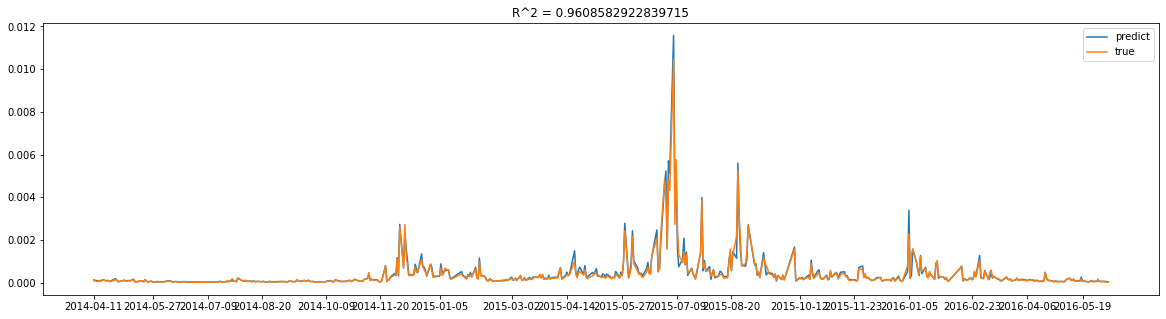

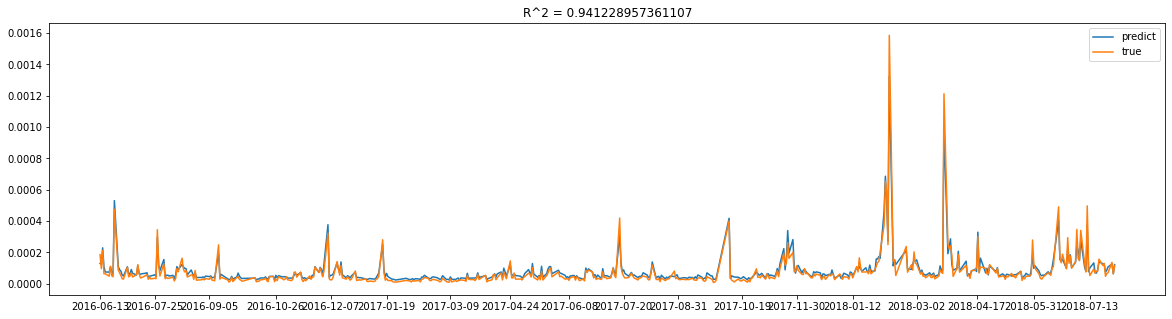

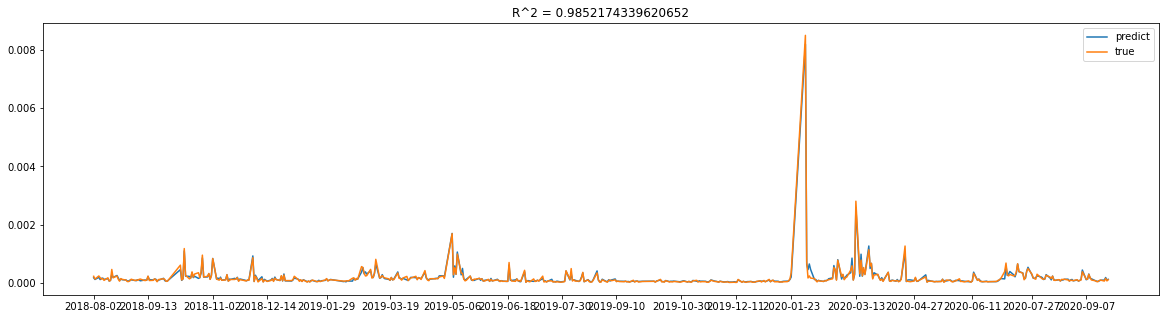

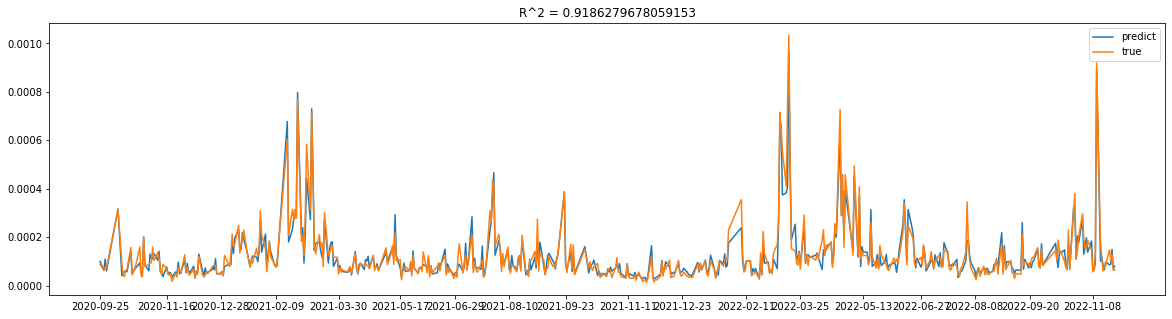

In [352]:
df = HAR_j(returns, rv_per_day)
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()


1.0                                               

{'daily': 0.19058531631107148,
 'week': 1.158676269534972,
 'month': 3.0611495001566102}

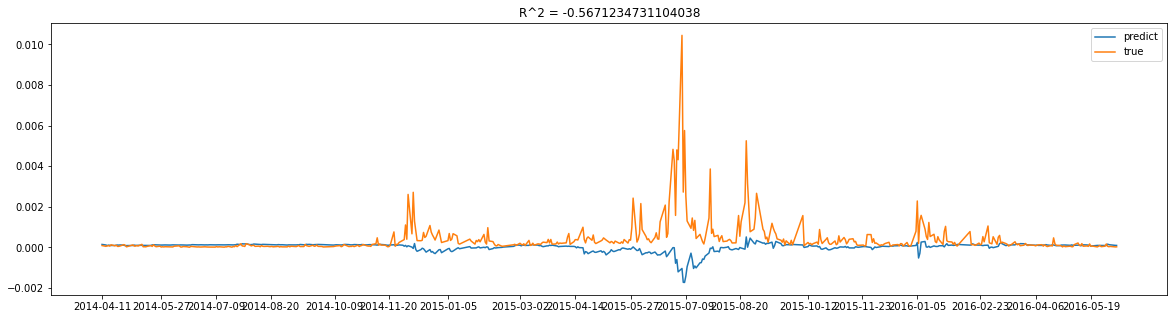

{'daily': 0.7139577124320248,
 'week': -4.41817442066667,
 'month': -4.312383765987409}

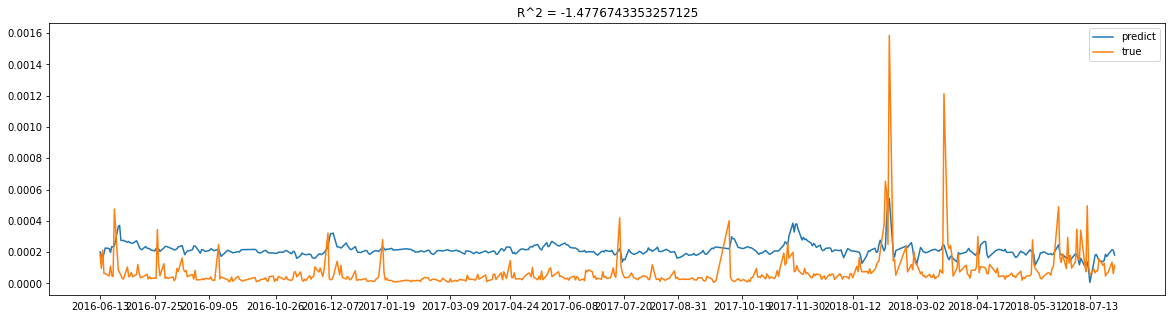

{'daily': 0.7090749619840788,
 'week': -4.443517312246814,
 'month': -4.504804127217198}

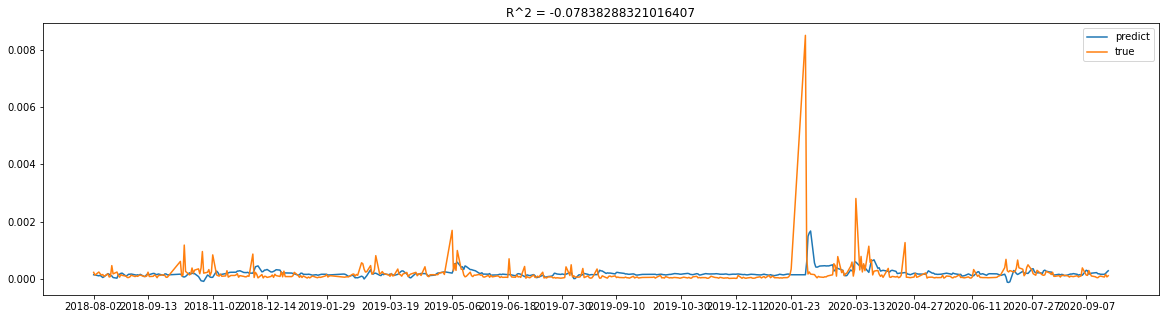

{'daily': 0.6097006178113883,
 'week': -3.8883151529155446,
 'month': -4.422632159669906}

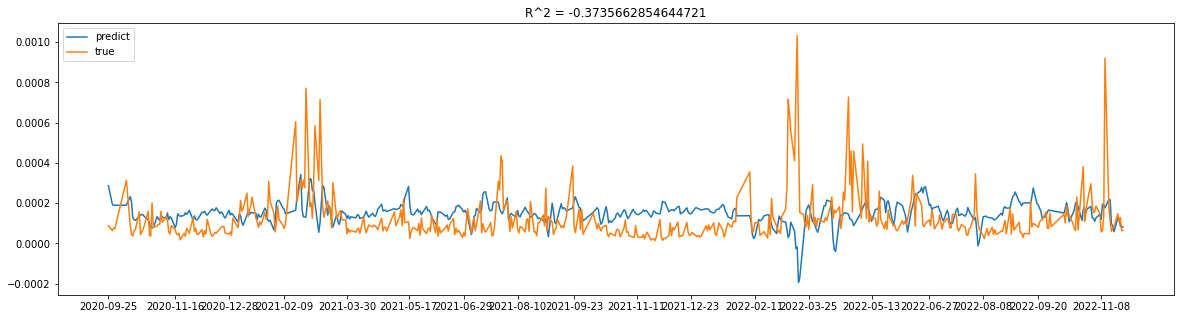

In [353]:
df = CHAR(returns, rv_per_day)
#df = CHAR_df
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    coefficents = {}
    coef = reg.coef_[0]
    for ind, x in enumerate([x for x in coef]):
        coefficents[features[ind]] = x
    display(coefficents)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()

In [159]:
returns.loc[returns['only_date'] == '2022-11-28']

,returns,date,only_date
155770,-0.019565,2022-11-28 04:30:00,2022-11-28
155771,-0.001229,2022-11-28 04:35:00,2022-11-28
155772,-0.002015,2022-11-28 04:40:00,2022-11-28
155773,-0.002486,2022-11-28 04:45:00,2022-11-28
155774,-0.001276,2022-11-28 04:50:00,2022-11-28
...,...,...,...
155829,0.000000,2022-11-28 10:50:00,2022-11-28
155830,0.000000,2022-11-28 10:55:00,2022-11-28
155831,0.000000,2022-11-28 11:00:00,2022-11-28
155832,0.000000,2022-11-28 11:05:00,2022-11-28


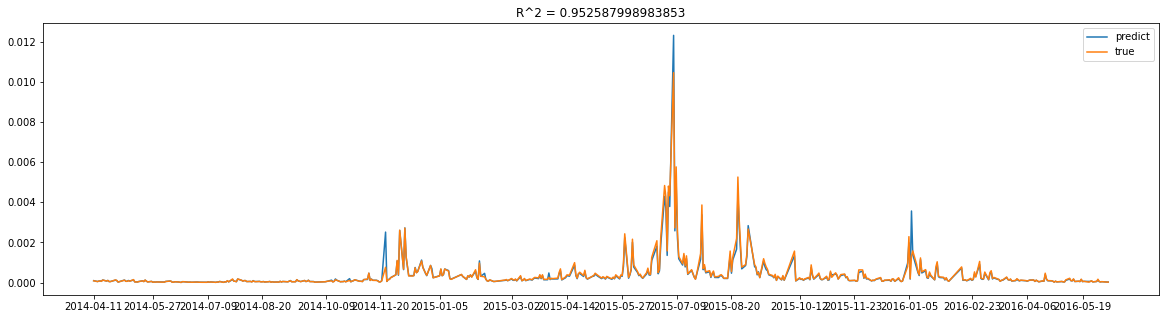

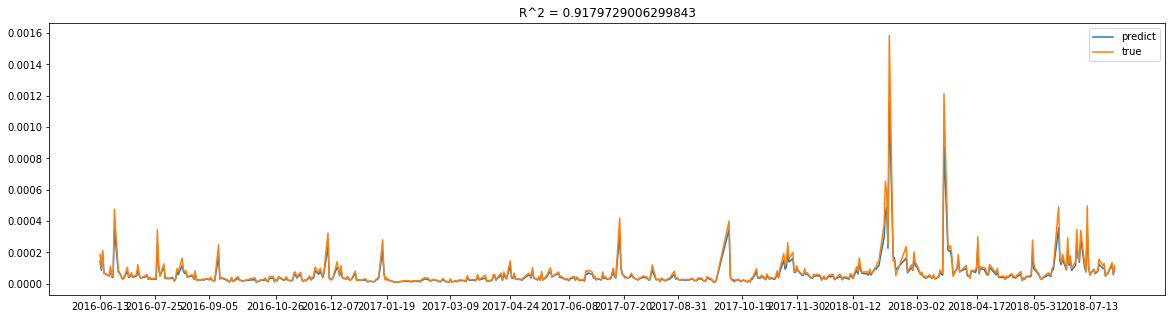

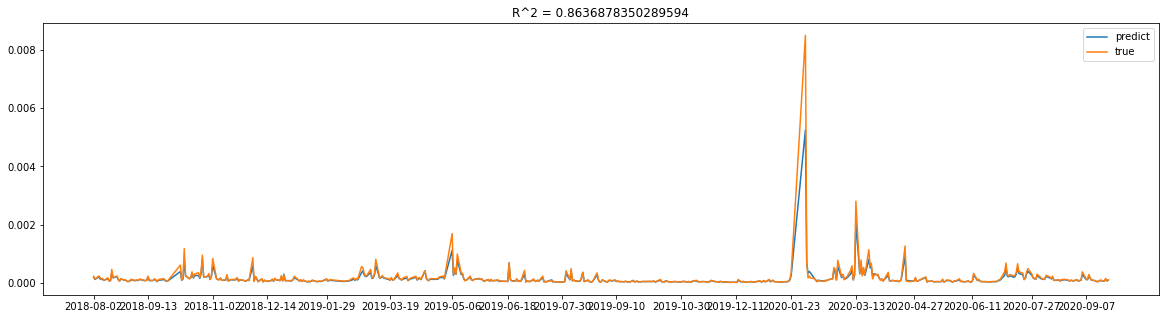

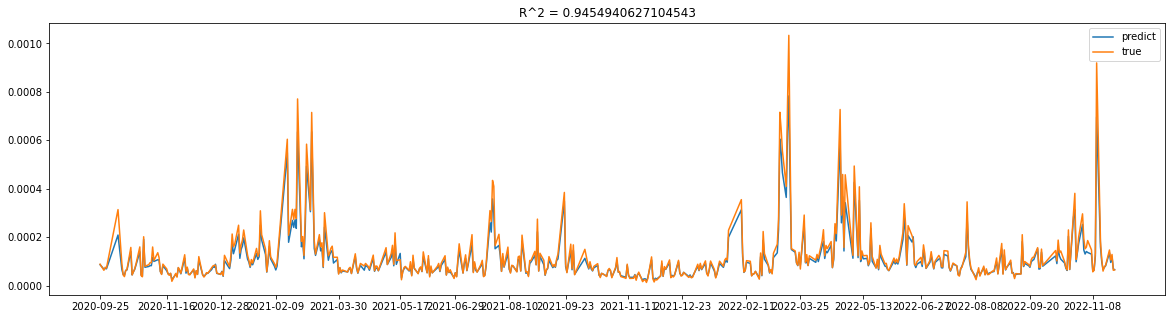

In [354]:
df = SHAR(returns, rv_per_day)
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()

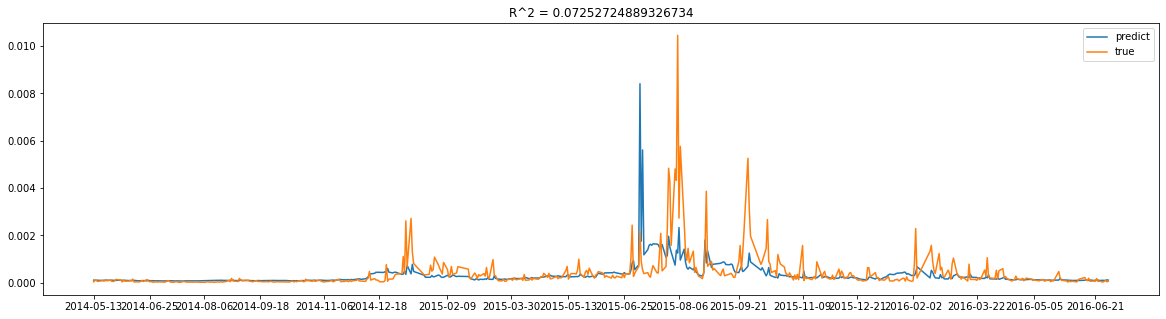

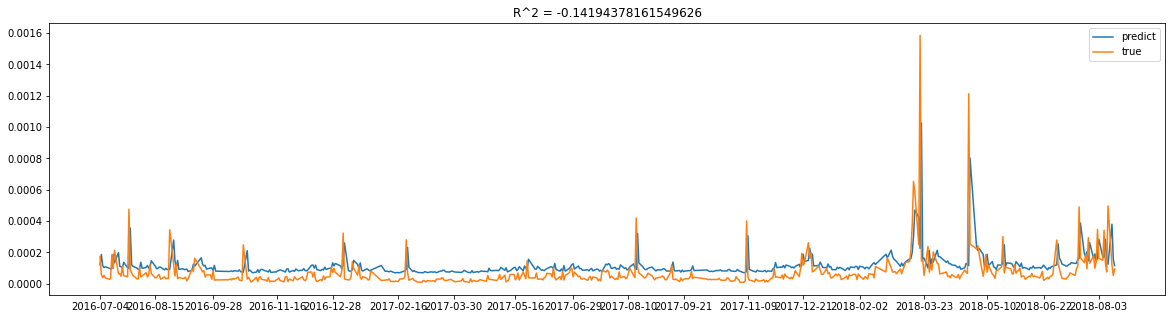

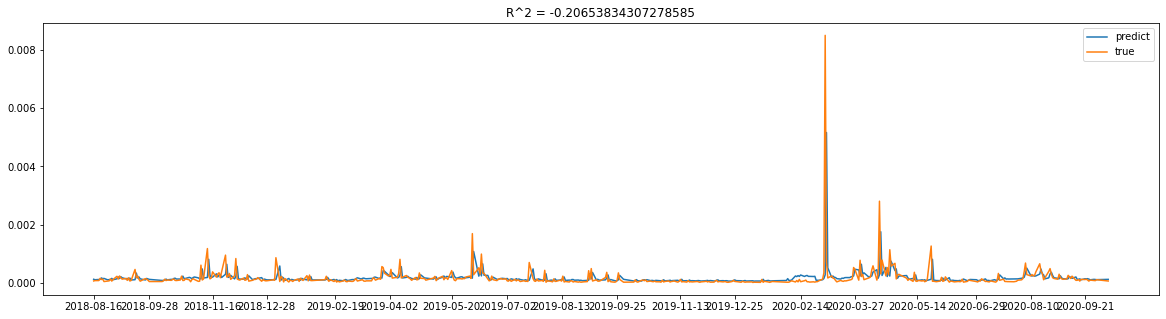

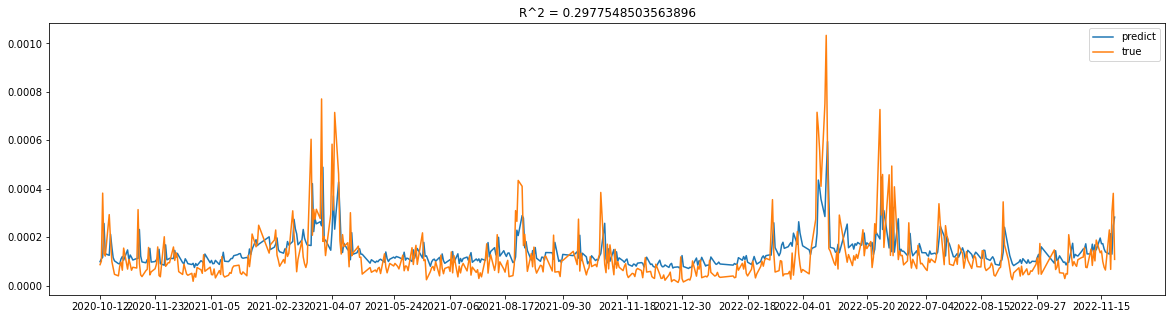

In [301]:
df = HARQ(returns, rv_per_day)
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()

['day', 'RQ^1/2', 'week', 'week_RQ^1/2', 'month', 'month_RQ^1/2']


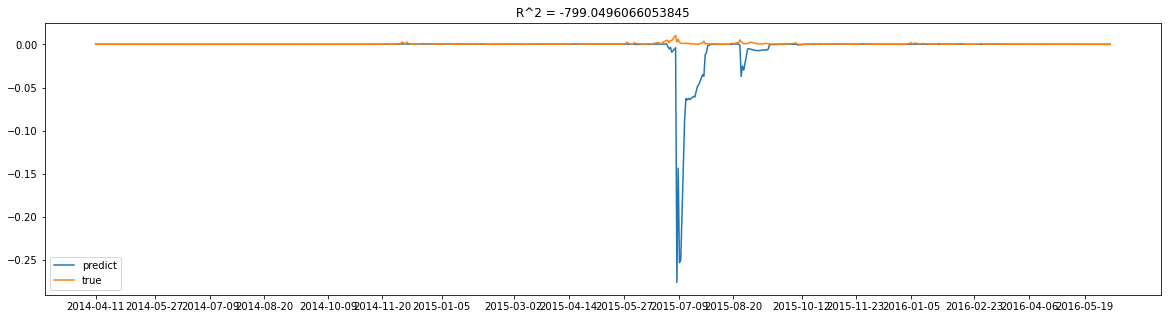

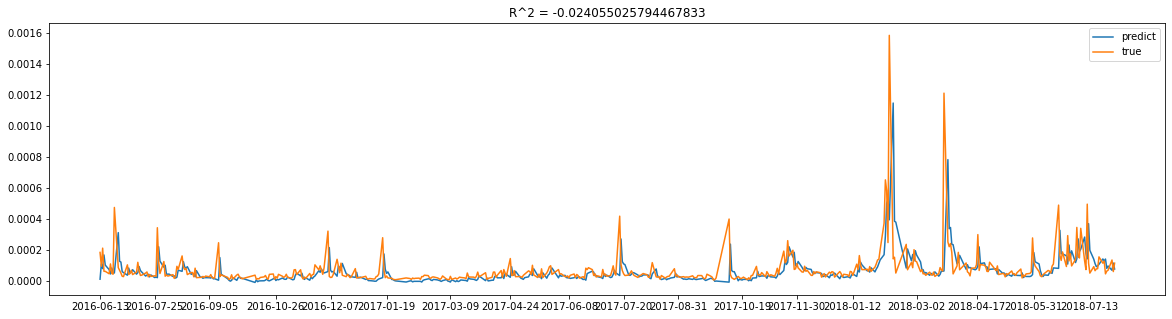

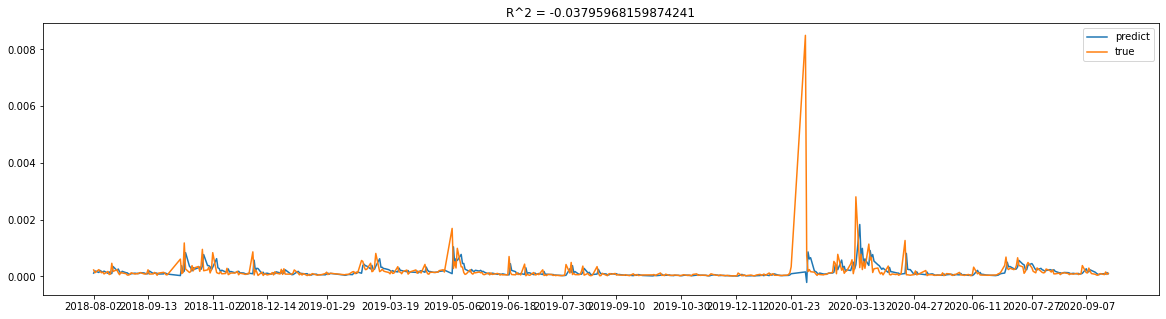

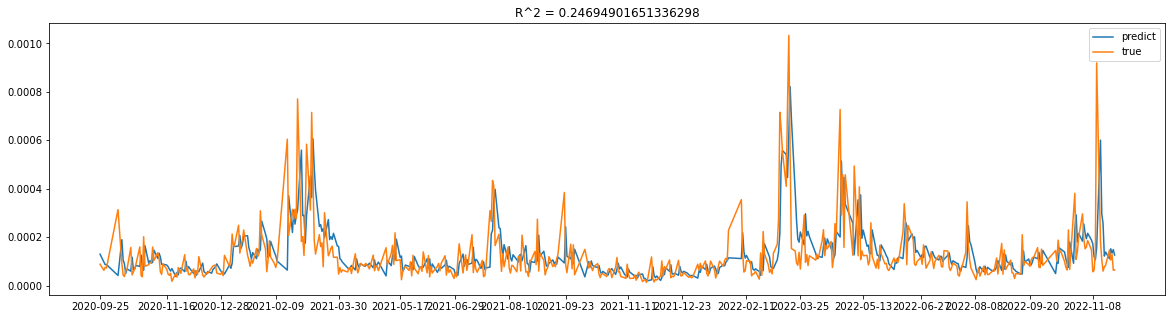

In [302]:
df = HARQF(returns, rv_per_day)
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
print(features)
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()

# All models in one & train set - $\frac{9}{10}$ of all data

{'day': 0.2670882123178876,
 'week': 0.47048584187087145,
 'month': 0.3243292242356256}

{'day': -0.030912458971464222,
 'week': 0.11785735336282464,
 'month': 0.008813941578153715,
 'jump': 0.8572740601753225}

{'daily': 0.6139233000307615,
 'week': -3.3074802119379907,
 'month': -4.650438988589632}

{'day+': 19.06172635827386,
 'day-': 32.11619936750908,
 'week': 0.02761689010355628,
 'month': 0.02023543829828425}

{'RQ^1/2': -433.2214349103119,
 'day': 0.5791011261858975,
 'week': 0.3012713647093342,
 'month': 0.20801517671673916}

{'day': 0.4351390804044779,
 'RQ^1/2': -292.63547166549364,
 'week': 0.6346588323383066,
 'week_RQ^1/2': -1497.3343673272052,
 'month': 0.4085688726767206,
 'month_RQ^1/2': -4295.063479786521}

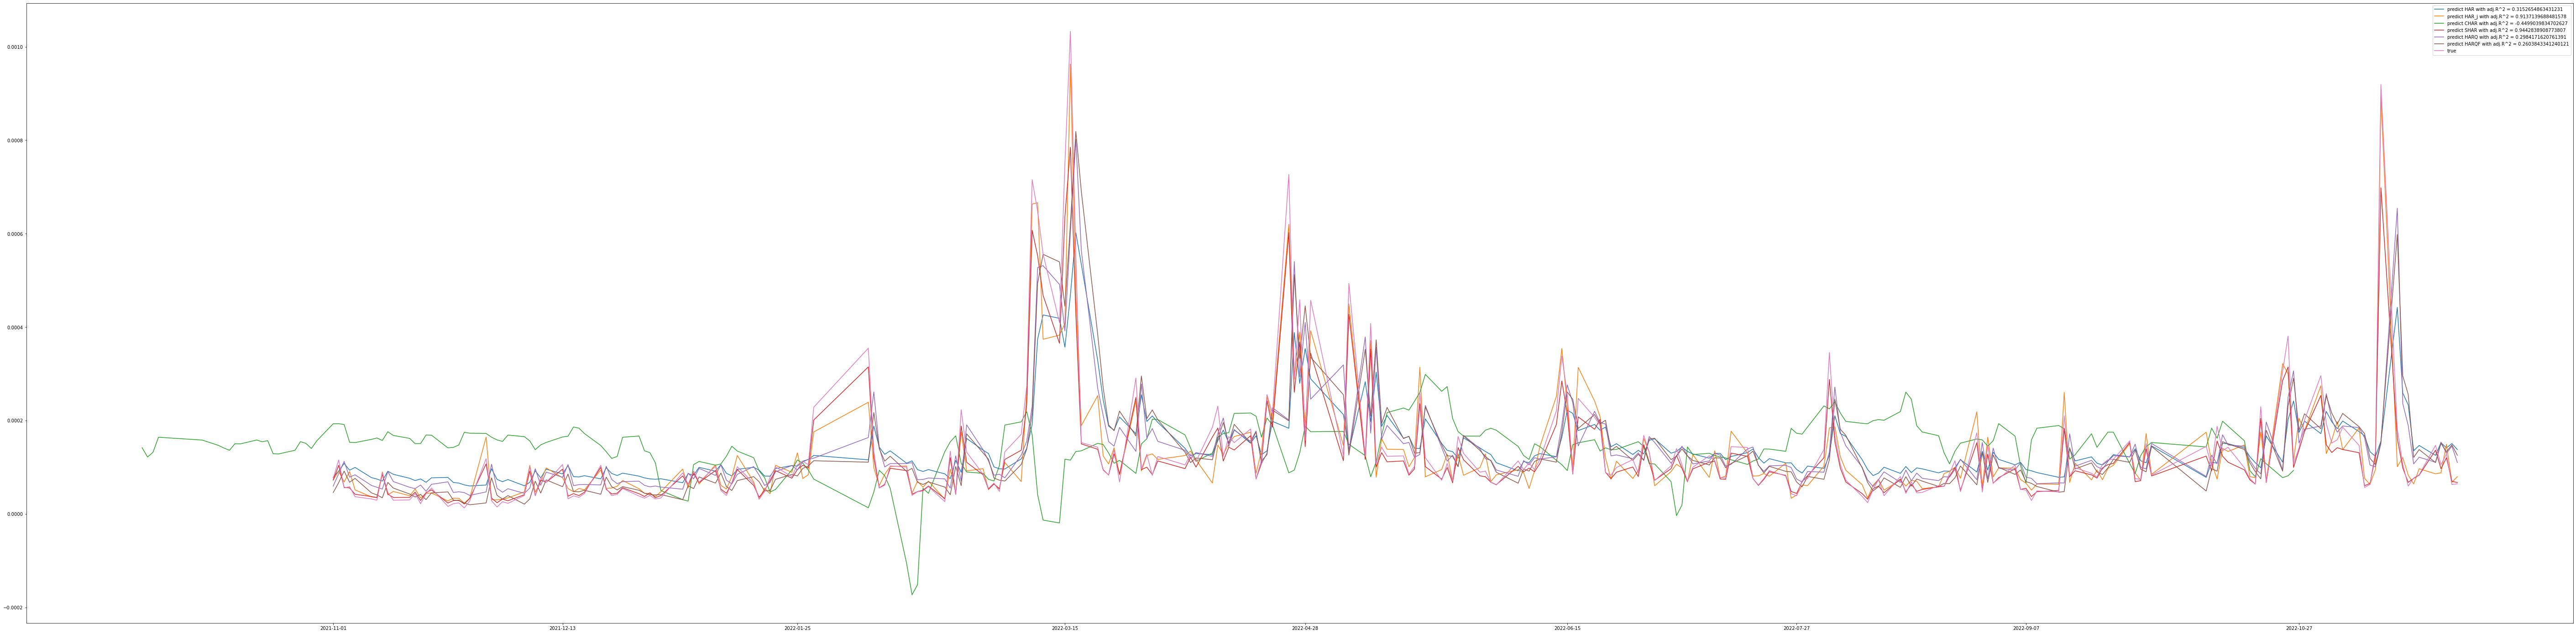

In [55]:
i = 0
names = ['HAR', 'HAR_j', 'CHAR', 'SHAR', 'HARQ', 'HARQF']

fig = plt.figure(figsize=(100, 25))
for df in [df_HAR, df_HAR_j, df_CHAR, df_SHAR, df_HARQ, df_HARQF]: #[x(returns, rv_per_day) for x in [HAR, HAR_j, CHAR, SHAR, HARQ]]:#, HARQF]]:
    features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
    target = ['rv']
    #tscv = TimeSeriesSplit(n_splits = 4)
    #for train_index, test_index in tscv.split(df):
    #cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    param = 9 * df.shape[0]//10
    X_train = df[features][:param]
    y_train = df[target][:param]
    X_test = df[features][param:]
    y_test = df[target][param:]
    #print(df.shape, X_train.shape, X_test.shape)
    reg = LinearRegression().fit(X_train, y_train)
    coefficents = {}
    coef = reg.coef_[0]
    for ind, x in enumerate([x for x in coef]):
        coefficents[features[ind]] = x
    display(coefficents)
    plt.plot(df['date'][param:],reg.predict(X_test), label = 'predict ' + names[i] + ' with adj.R^2 = ' + str(1 - ((1 - r2_score(y_test, reg.predict(X_test))) * (y_test.shape[0] -1) / (y_test.shape[0] - len(features) -1))))
    if (i == 5):
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    
        #ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
        plt.plot(df['date'][param:],y_test, label = 'true')
        plt.xticks(df['date'][param:][::30])
        plt.legend()
        plt.show()
    i +=1